# **PLQY_individual**

_by Felix Eickemeyer_

PLQY, this notebook is based on "PLQY 1.3.4.ipynb".
Calibration and correction has to be done before.
__

_Version 13.10.2021 in Python 3_

_Change log:_  
0.1.0: My package used  
1.0.0: First version bug free and usable for thot desktop  
1.1.0: All graphs saved as assets  

In [22]:
import os
from os import getcwd, listdir
import thot
from thot import ThotProject
import importlib
from importlib import reload

from FTE_analysis_libraries import General, XYdata, Spectrum

reload(General)
from FTE_analysis_libraries.General import *

reload(XYdata)
from FTE_analysis_libraries.XYdata import *

reload(Spectrum)
from FTE_analysis_libraries.Spectrum import *

In [26]:
# Initializes Thot project
db = ThotProject( dev_root = '_template' )
root = db.find_container( { '_id': db.root } )

**Define which laser and where PL signal is**

In [23]:
#Perovskite
which_sample = root.metadata[ 'sample_type' ]

#DSC
#which_sample = 'Yameng DSC'
#which_sample = 'dye on TiO2'
#which_sample = 'dye on Al2O3'
#which_sample = 'Coumarin 153'
#which_sample = 'MS5'
#which_sample = 'XY1b'

#Standard values used for functions below
#It is necessary, because many functions use as standard parameters e.g. PL_peak + corr_offs_left
#In a later version that should be changed because if PL_peak_auto is chosen then PL_peak is chosen automatically
PL_peak = 790 # nm
# The ip PL signal will be corrected by the fs measurement. The fit is carried out from PL_peak+corr_offs_left to PL_peak+corr_offs_right 
corr_offs_left = 40 # nm
corr_offs_right = 50 # nm
PL_peak_auto = False # determine automatically off

if which_sample == 'FAPbI3':
    excitation_laser = 657 #nm
    PL_left = 700 #nm
    PL_right = 950 #nm
    # The ip PL signal will be corrected by the fs measurement. The fit is carried out from PL_peak+corr_offs_left to PL_peak+corr_offs_right 
    corr_offs_left = 40 # nm
    corr_offs_right = 50 # nm
    PL_peak_auto = True # determine automatically
    eval_Pb = False
if which_sample == 'Haizhou-FAPbI3': # Very high quality FAPbI3 samples
    excitation_laser = 657 #nm
    PL_left = 700 #nm
    PL_right = 950 #nm
    # The ip PL signal will be corrected by the fs measurement. The fit is carried out from PL_peak+corr_offs_left to PL_peak+corr_offs_right 
    corr_offs_left = 60 # nm
    corr_offs_right = 70 # nm
    PL_peak_auto = True # determine automatically
    eval_Pb = True
elif which_sample == 'Yameng DSC':
    excitation_laser = 421 #nm
    PL_left = 600 #nm
    PL_right = 1000 #nm
    PL_peak = 700 #nm
    # The ip PL signal will be corrected by the fs measurement. The fit is carried out from PL_peak+corr_offs_left to PL_peak+corr_offs_right 
    corr_offs_left = -10 # nm
    corr_offs_right = +10 # nm
    eval_Pb = False
elif which_sample == 'dye on TiO2':
    excitation_laser = 421 #nm
    PL_left = 600 #nm
    PL_right = 900 #nm
    #PL_peak = 700 #nm
    # The ip PL signal will be corrected by the fs measurement. The fit is carried out from PL_peak+corr_offs_left to PL_peak+corr_offs_right 
    corr_offs_left = -10 # nm
    corr_offs_right = +10 # nm
    PL_peak_auto = True # determine automatically
    eval_Pb = False
elif which_sample == 'dye on Al2O3':
    excitation_laser = 421 #nm
    PL_left = 600 #nm
    PL_right = 1000 #nm
    #PL_peak = 700 #nm
    # The ip PL signal will be corrected by the fs measurement. The fit is carried out from PL_peak+corr_offs_left to PL_peak+corr_offs_right 
    corr_offs_left = -10 # nm
    corr_offs_right = +10 # nm
    PL_peak_auto = True # determine automatically
    eval_Pb = False
elif which_sample == 'Coumarin 153':
    excitation_laser = 421 #nm
    PL_left = 450 #nm
    PL_right = 830 #nm
    # The ip PL signal will be corrected by the fs measurement. The fit is carried out from PL_peak+corr_offs_left to PL_peak+corr_offs_right 
    corr_offs_left = 20 # nm
    corr_offs_right = 30 # nm
    PL_peak_auto = True # determine automatically
    eval_Pb = True
elif which_sample == 'XY1b':
    excitation_laser = 421 #nm
    PL_left = 590 #nm
    PL_right = 1000 #nm
    # The ip PL signal will be corrected by the fs measurement. The fit is carried out from PL_peak+corr_offs_left to PL_peak+corr_offs_right 
    corr_offs_left = 20 # nm
    corr_offs_right = 30 # nm
    PL_peak_auto = True # determine automatically
    eval_Pb = False
elif which_sample == 'MS5':
    excitation_laser = 421 #nm
    PL_left = 500 #nm
    PL_right = 920 #nm
    # The ip PL signal will be corrected by the fs measurement. The fit is carried out from PL_peak+corr_offs_left to PL_peak+corr_offs_right 
    corr_offs_left = 20 # nm
    corr_offs_right = 30 # nm
    PL_peak_auto = True # determine automatically
    eval_Pb = False
else:
    #excitation_laser = 403 #nm
    #excitation_laser = 419 #nm
    excitation_laser = 421 #nm
    #excitation_laser = 422 #nm old system
    #excitation_laser = 657 #nm

    # PL signal will be evaluated from left to right
    #PL_left = 500 #nm
    PL_left = 600 #nm
    #PL_left = 760 #nm
    #PL_left = 735 #nm
    #PL_left = 700 #nm
    #PL_left = 750 #nm
    #PL_right = 600 #nm
    #PL_right = 900 #nm
    #PL_right = 920 #nm
    #PL_right = 950 #nm
    PL_right = 1000 #nm
    #PL_right = 1030 #nm

    # PL peak (for the readjustment of the inbeam PL with fs PL)
    #PL_peak = 540
    PL_peak = 700 #nm
    #PL_peak = 750 #nm
    #PL_peak = 790 #nm
    #PL_peak = 800 #nm
    #PL_peak = 920 #nm
    eval_Pb = False

In [24]:
# These laser limits will be used to evaluate PL photon flux
if excitation_laser == 403:
    laser_left = 390
    laser_right = 420
elif excitation_laser == 419:
    laser_left = 410
    laser_right = 428
elif excitation_laser == 421:
    laser_left = 414
    laser_right = 428
elif excitation_laser == 422:
    laser_left = 415
    laser_right = 428
elif excitation_laser == 657:
    laser_left = 640
    laser_right = 670

# Laser and PL marker
if excitation_laser == 403:
    laser_marker = '405BPF'
    PL_marker = '450LPF'
elif excitation_laser == 419:
    laser_marker = '420BPF'
    PL_marker = '450LPF'
elif excitation_laser == 657:
    laser_marker = '650BPF'
    #laser_marker = '660BPF'
    #PL_marker = '685LPF'
    PL_marker = '700LPF'

In [25]:
class PLQY_dataset:
    
    def __init__(self, db, La, Lb, Lc, Pa, Pb, Pc, fs, sample_name):
        
        def load_spectrum(LP):
            return PEL_spectrum.load(os.path.dirname(LP.file), FN = os.path.basename(LP.file), take_quants_and_units_from_file = True)
        
        def create_PELspectra_obj(sa):
            PEL = PEL_spectra(sa)
            PEL.label([])
        
        self.db = db
        self.sample_name = sample_name
        self.La_asset = La
        self.La = load_spectrum(La)
        self.Lb_asset = Lb
        self.Lb = load_spectrum(Lb)
        self.Lc_asset = Lc
        self.Lc = load_spectrum(Lc)
        self.Pa_asset = Pa
        self.Pa = load_spectrum(Pa)
        self.Pb_asset = Pb
        self.Pb = load_spectrum(Pb)
        self.Pc_asset = Pc
        self.Pc = load_spectrum(Pc)
        self.fs_asset = fs
        self.fs = load_spectrum(fs)
        self.PL_peak = None

        self.all = PEL_spectra([self.La, self.Lb, self.Lc, self.Pa, self.Pb, self.Pc, self.fs])
        self.all.label(['La', 'Lb', 'Lc', 'Pa', 'Pb', 'Pc', 'fs'])
        
        self.P = PEL_spectra([self.Pa, self.Pb, self.Pc])
        self.P.label(['Pa', 'Pb', 'Pc'])
        self.L = PEL_spectra([self.La, self.Lb, self.Lc])
        self.L.label(['La', 'Lb', 'Lc'])

    def plot(self, *args, **kwargs):
        self.all.plot(*args, **kwargs)
        all_graph = self.all.plot(*args, return_fig = True, show_plot = False, **kwargs)
        add_graph(self.db, self.sample_name+'_all.png', all_graph)
        del all_graph
        
    def find_PL_peak(self):
        #Finds the PL peak of the free space spectrum between PL_left and PL_right
        if self.PL_peak == None:
            if PL_peak_auto:
                ra = self.fs.idx_range(left = PL_left, right = PL_right)
                PL_peak = self.fs.x_of(max(self.fs.y[ra]))
            self.PL_peak = PL_peak
        #PL_peak_x is the wavelength of the PL peak, needed in the method "abs_pf_spec"
        self.PL_peak_x = self.fs.x_of(PL_peak, start = PL_left)
        self.Eg = f1240/self.PL_peak #eV
        self.Vsq = Vsq(self.Eg) #V
        
    def inb_oob_adjust(self, what = 'inb', left = None, right = None, adj_factor = None, show_adjust_factor = False, show = False, divisor = 1e3):
        # adj_factor: manual adjustment factor. It is advisable to run this routine first with show_adjust_factor = True and then take this as a basis for the adj_factor
        # automatically calculate the factor

        fs = self.fs
        if what == 'inb':
            sp = self.Pc
        elif what == 'oob':
            sp = self.Pb
            
        def guess_factor(left, right):
            """
            Returns the inbeam or outofbeam-free space adjustment factor.
            """

            fs_ = fs.copy()
            sp_ = sp.copy()
            
            delta = fs_.x[1] - fs_.x[0] 
            fs_.equidist(left = left, right = right, delta = delta)
            sp_.equidist(left = left, right = right, delta = delta)

            def f(fac): 
                diff = sp_.y - fac * fs_.y
                return math.sqrt(1/len(diff) * np.dot(diff, diff))

            result = least_squares(fun = f, x0 = [1])

            return result.x[0]

        left = self.PL_peak + corr_offs_left
        right = self.PL_peak + corr_offs_right

        if adj_factor == None:
            factor = guess_factor(left = left, right = right)
        else:
            factor = adj_factor
            
        self.adj_factor = factor
        
        if show_adjust_factor:
            print(f'The inbeam/outofbeam adjust factor is {factor:.2e}')
        
        sp_orig = sp.copy()
        if what == 'inb':
            #We'll need the original spectrum later
            self.Pc_orig = sp_orig
            #self.Pc.y = fs.y * factor 
            self.Pc_corrfac = factor
        elif what == 'oob':
            #We'll need the original spectrum later
            self.Pb_orig = sp_orig
            self.Pb_corrfac = factor
        sp.y = fs.y * factor  

        if show:
            fssp = PEL_spectra([sp_orig, sp])
            fssp.label([what, 'adjusted'])
            
            fssp_lin_graph = fssp.plot(yscale = 'linear', left = PL_left, right = PL_right, divisor = divisor, title = 'Correction for '+ what, figsize = (7,5), return_fig = True, show_plot = False)
            add_graph(db, f'{self.sample_name}_fs_{what}_correction(linear).png', fssp_lin_graph)
            del fssp_lin_graph
            
            fssp_log_graph = fssp.plot(yscale = 'log', left = PL_left, right = PL_right, divisor = divisor, title = 'Correction for '+ what, figsize = (7,5), return_fig = True, show_plot = False)
            add_graph(db, f'{self.sample_name}_fs_{what}_correction(semilog).png', fssp_log_graph)
            del fssp_log_graph
        
    def inb_adjust(self, left = None, right = None, adj_factor = None, show_adjust_factor = False, show = False, divisor = 1e3):
            self.inb_oob_adjust(what = 'inb', left = left, right = right, adj_factor = adj_factor, show_adjust_factor = show_adjust_factor, show = show, divisor = divisor)
    def oob_adjust(self, left = None, right = None, adj_factor = None, show_adjust_factor = False, show = False, divisor = 1e3):
            self.inb_oob_adjust(what = 'oob', left = left, right = right, adj_factor = adj_factor, show_adjust_factor = show_adjust_factor, show = show, divisor = divisor)

    def calc_abs(self, what = 'inb', show_details = False):
        #Calculates the absorptance spectrum from the fs and inbeam or outofbeam PL spectrum
        if what == 'inb':
            sp_orig = self.Pc_orig
            sp = self.Pc
        elif what == 'oob':
            sp_orig = self.Pb_orig
            sp = self.Pb

        # I,fs -> ip -> I,ib ==> A = 1-T = 1-I,ib/I,fs
        left = PL_left
        right = PL_right
        r = range(sp.x_idx_of(left), sp.x_idx_of(right)-1)
        x = sp.x[r]
        y_ib = sp_orig.y[r]
        y_fs = sp.y[r]
        zero_mask = np.where( y_fs != 0 )
        A = 1-y_ib[zero_mask]/y_fs[zero_mask]
        s = abs_spectrum(x[zero_mask], A)
        s.qy = 'A'
        if show_details:
            abs_graph = s.plot(title = 'Absorptance spectrum', hline = 0, bottom = -0.2, top = 1, figsize = (8,5), return_fig = True, show_plot = False)
            add_graph(db, f'{self.sample_name}_absorptance_with_{what}.png', abs_graph)
            del abs_graph

        
        
    def calc_PLQY(self, eval_Pa = False, eval_Pb = True, show = False, show_lum = 'log'):
        
        La = self.La.photonflux(start = laser_left, stop = laser_right)
        Lb = self.Lb.photonflux(start = laser_left, stop = laser_right)
        Lc = self.Lc.photonflux(start = laser_left, stop = laser_right)

        if eval_Pa:
            Pa = self.Pa.photonflux(start = PL_left, stop = PL_right)
        else:
            Pa = 0

        if eval_Pb:
            Pb = self.Pb.photonflux(start = PL_left, stop = PL_right)
        else:
            Pb = 0

        Pc = self.Pc.photonflux(start = PL_left, stop = PL_right)

        Pb = Pb - Pa
        Pc = Pc - Pa
        A = 1 - Lc/Lb
        PLQY = (Pc - (1 - A) * Pb) / (La * A)

        if show:
            laser_graph = self.L.plot(yscale = 'linear', left = laser_left, right = laser_right, title = 'Laser signal', showindex = False, in_name = laser_marker, figsize = (7,5), hline = 0, return_fig = True, show_plot = False)
            add_graph(db, f'{self.sample_name}_L.png', laser_graph)
            del laser_graph

            PL_graph = self.P.plot(yscale = show_lum, left = PL_left, right = PL_right, divisor = 1e7, title = 'Luminescence signal', showindex = False, in_name = PL_marker, figsize = (7,5), hline = 0, return_fig = True, show_plot = False)
            add_graph(db, f'{self.sample_name}_P.png', PL_graph)
            del PL_graph

            print(f'La = {La:.2e} 1/(s m2)')
            print(f'Lb = {Lb:.2e} 1/(s m2)')
            print(f'Lc = {Lc:.2e} 1/(s m2)')

            print(f'Pa = {Pa:.2e} 1/(s m2)')
            print(f'Pb = {Pb:.2e} 1/(s m2)')
            print(f'Pc = {Pc:.2e} 1/(s m2)')

            print(f'A = 1 - Lc/Lb = {A*100:.1f} %')

            print(f'PLQY = (Pc - (1 - A) * Pb) / (La * A) = {PLQY:.2e}')

        self.PLQY = PLQY
        self.A = A
        self.LaPF = La
        self.LbPF = Lb
        self.LcPF = Lc
        self.PaPF = Pa
        self.PbPF = Pb
        self.PcPF = Pc
        self.V_loss = V_loss(PLQY)
        self.QFLS = QFLS(self.Eg, PLQY)

        
    def abs_pf_spec(self, nsuns = 1):
        """
        Calculates the absolute photon flux spectrum for nsuns excitation and saves it as self.absPFspec
        :param nsuns: number of suns
        """
        PF = self.fs.photonflux(start = PL_left, stop = PL_right)
        #print(PF)

        # 1 sun photon flux
        #Bandgap in eV
        Eg = f1240/self.PL_peak_x #eV
        sun_PF = above_bg_photon_flux(Eg)

        nsun_PF = nsuns * sun_PF
        # Factor fac with which relative spectral photon flux has to be multiplied to yield an absolute spectral photon flux
        fac =  sun_PF * self.PLQY / PF    
        self.fs_absint_factor = fac
        sp = self.fs.copy()
        sp.y = sp.y * fac
        sp = sp.cut_data_outside(left = PL_left, right = PL_right)
        self.absolutePFspec = sp
        
    def save_asset(self):
        
        metadata = dict(A = self.A, PLQY = self.PLQY, Peak = self.PL_peak, Eg = self.Eg, Vsq = self.Vsq, dV = self.V_loss, QFLS = self.QFLS, adj_fac = self.adj_factor, fs_absint_factor = self.fs_absint_factor)
        #print(metadata)
        asset_name = f'{self.sample_name}_absolute PL spectrum'
        asset_prop = dict(name = asset_name, type = 'absolute PL spectrum', metadata = metadata)
        TFN = db.add_asset(asset_prop)
        fn = os.path.basename(TFN) + '.csv'
        #print(fn)
        directory = os.path.dirname(TFN)
        self.absolutePFspec.save(directory, fn, check_existing = False)
        print(f'File saved: {join(directory,fn)}')

In [27]:
samples = db.find_assets({'type' : 'calibrated PL spectrum'})
names = list({sample.metadata['name'] for sample in samples})
names.remove('no sample')
names

['glass-per-OAI_1',
 'glass-per-OAI-CB+tbp_2',
 'glass-per_2',
 'glass-per-OAI-CB_2',
 'glass-per-CB+ACN_1',
 'glass-per-OAI_2',
 'glass-per-OAI+CB+tbp+ACN_1',
 'glass-per-OAI-CB+ACN_1',
 'glass-per-OAI-CB_1',
 'glass-per-OAI-CB+ACN_2',
 'glass-per-spiro_1',
 'glass-per-CB+ACN_2',
 'glass-per-CB+tbp+ACN_1',
 'glass-per-CB+tbp_2',
 'glass-per-CB_1',
 'glass-per-CB+tbp+ACN_2',
 'glass-per-CB+tbp_1',
 'glass-per_1',
 'glass-per-OAI+CB+tbp+ACN_2',
 'glass-per-CB_2',
 'glass-per-OAI-CB+tbp_1']

In [28]:
def find(dic, assets, show_details = False):
    asts = thot.filter(dic, assets)
    if len(asts) != 1:
        print(f'Error: {dic} in assets not found!')
    else:
        if show_details:
            print(asts[0].metadata['orig_fn'])
        return asts[0]

La = find({'metadata.name' : 'no sample', 'metadata.em_filter' : laser_marker}, samples, show_details = True)
Pa = find({'metadata.name' : 'no sample', 'metadata.em_filter' : PL_marker}, samples, show_details = True)

no sample--ip_laser--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_650BPF.csv
no sample--ip_laser--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_700LPF.csv


glass-per-OAI_1--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_650BPF.csv
glass-per-OAI_1--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_650BPF.csv
glass-per-OAI_1--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_700LPF.csv
glass-per-OAI_1--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_700LPF.csv
glass-per-OAI_1--fs--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_700LPF.csv
La = 1.42e+18 1/(s m2)
Lb = 1.26e+18 1/(s m2)
Lc = 3.31e+17 1/(s m2)
Pa = 0.00e+00 1/(s m2)
Pb = 2.49e+14 1/(s m2)
Pc = 9.76e+16 1/(s m2)
A = 1 - Lc/Lb = 73.7 %
PLQY = (Pc - (1 - A) * Pb) / (La * A) = 9.36e-02
File saved: C:\Users\dreickem\switchdrive\Work\Python\PL\Steady state PL\thot\PLQY_results\glass-per-OAI_1_absolute PL spectrum\glass-per-OAI_1_absolute PL spectrum.csv
glass-per-OAI-CB+tbp_2--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_650BPF.csv
glass-per-OAI-CB+tbp_2--

c:\users\dreickem\switchdrive\work\python\my_packages\fte-analysis-libraries-main\FTE_analysis_libraries\XYdata.py:1138: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


La = 1.42e+18 1/(s m2)
Lb = 1.17e+18 1/(s m2)
Lc = 3.28e+17 1/(s m2)
Pa = 0.00e+00 1/(s m2)
Pb = 2.45e+15 1/(s m2)
Pc = 2.13e+17 1/(s m2)
A = 1 - Lc/Lb = 72.1 %
PLQY = (Pc - (1 - A) * Pb) / (La * A) = 2.08e-01
File saved: C:\Users\dreickem\switchdrive\Work\Python\PL\Steady state PL\thot\PLQY_results\glass-per-CB+ACN_1_absolute PL spectrum\glass-per-CB+ACN_1_absolute PL spectrum.csv
glass-per-OAI_2--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_650BPF.csv
glass-per-OAI_2--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_650BPF.csv
glass-per-OAI_2--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_700LPF.csv
glass-per-OAI_2--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_700LPF.csv
glass-per-OAI_2--fs--laser_657nm_3.5mW_OD1--Andor_0.1s_50acc_300lmm_center850nm_700LPF.csv
La = 1.42e+18 1/(s m2)
Lb = 1.26e+18 1/(s m2)
Lc = 3.22e+17 1/(s m2)
Pa = 0.00e+00 1/(s m2)
Pb = 1.83e+14 1/(s m2)
Pc = 1.65e+

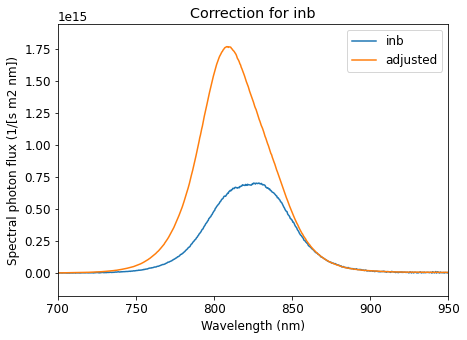

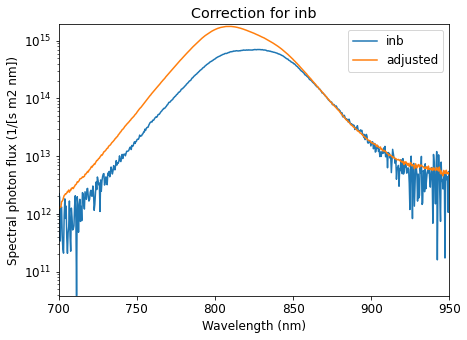

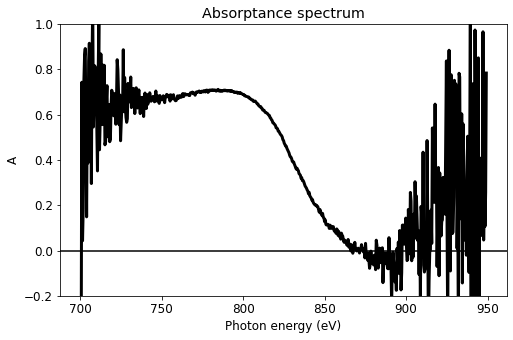

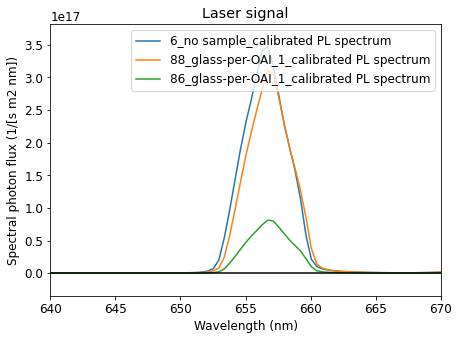

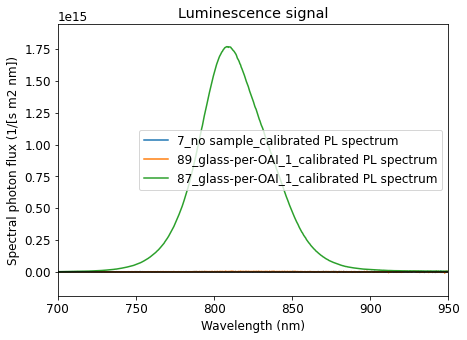

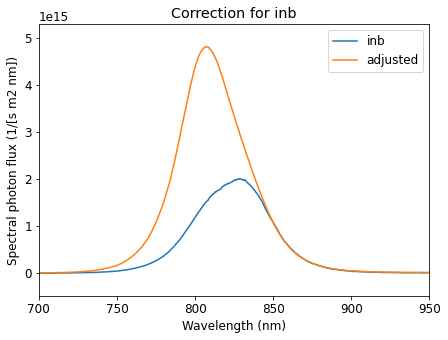

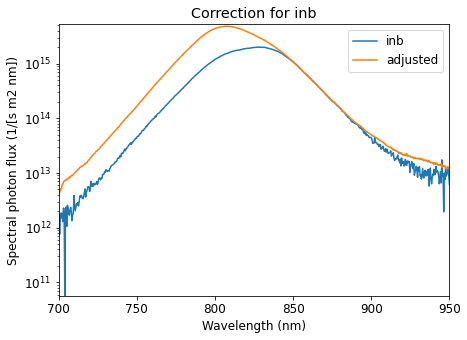

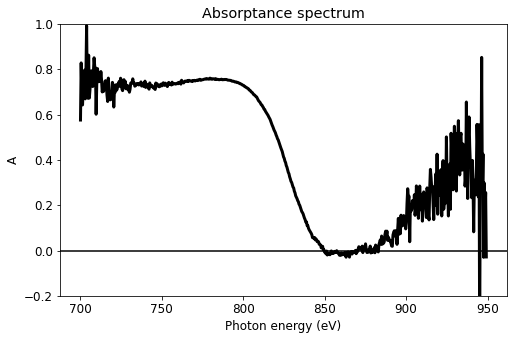

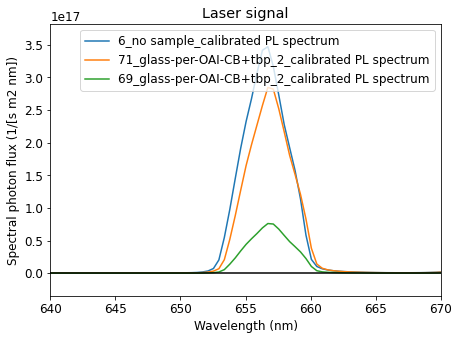

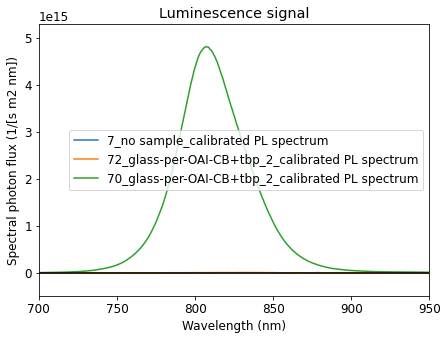

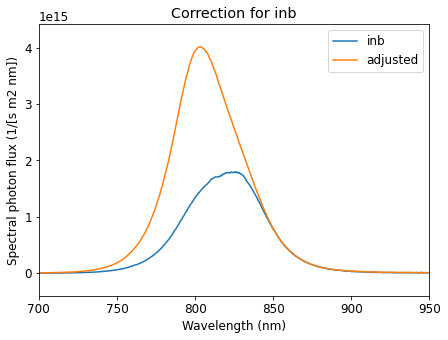

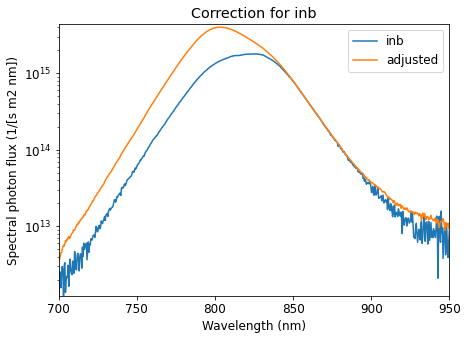

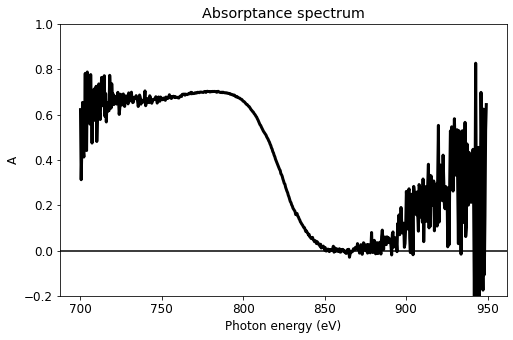

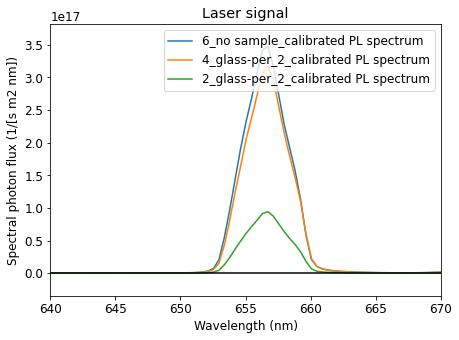

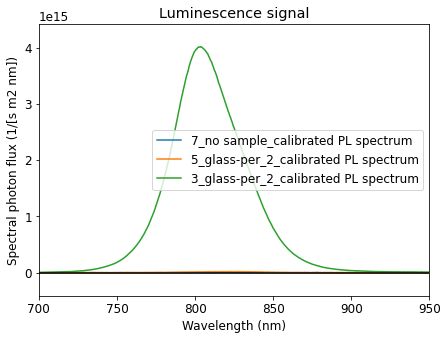

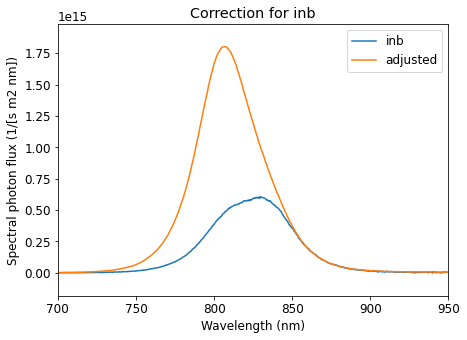

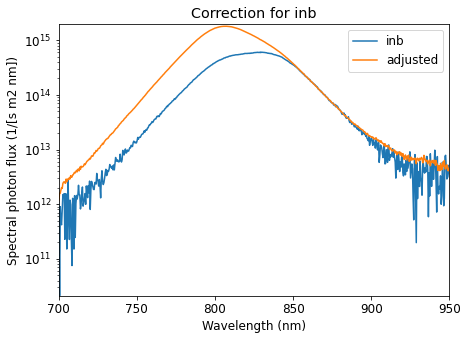

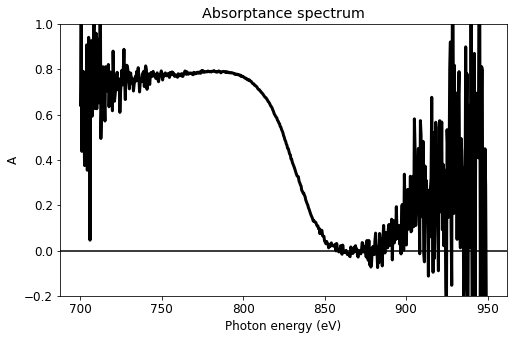

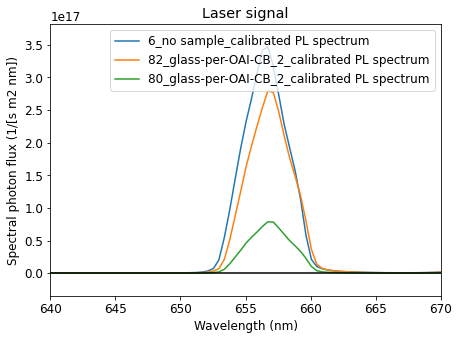

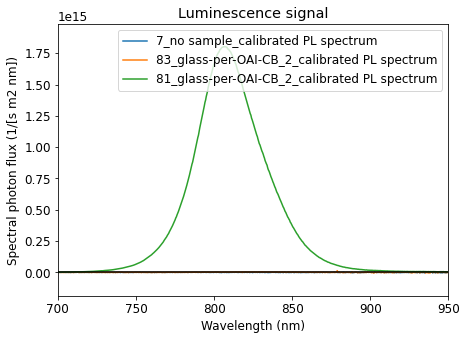

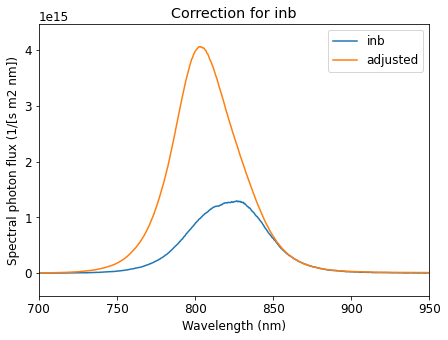

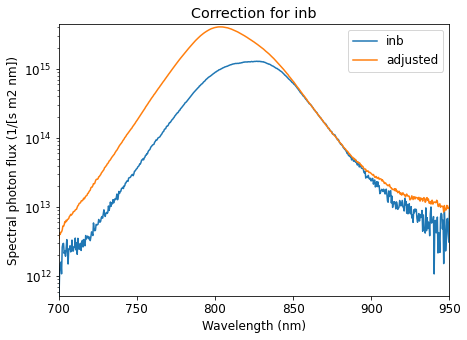

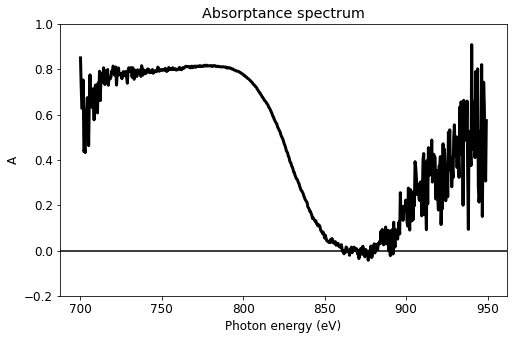

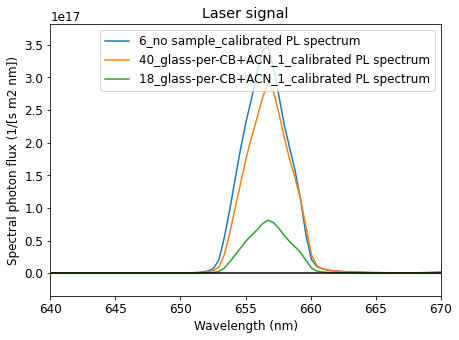

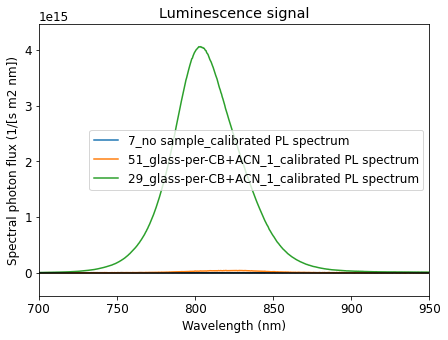

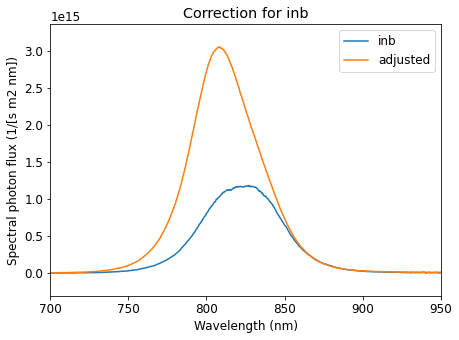

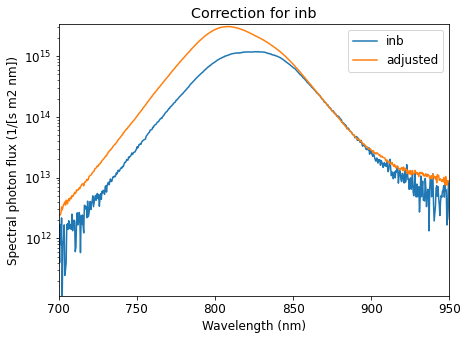

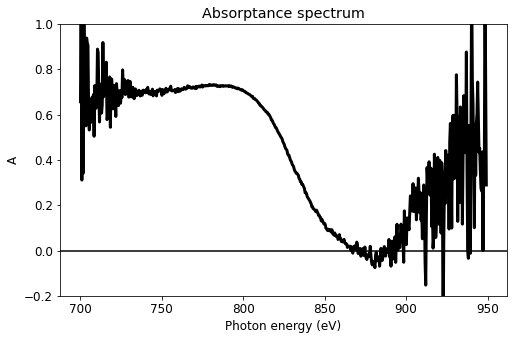

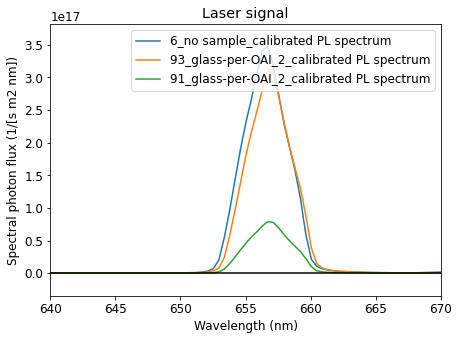

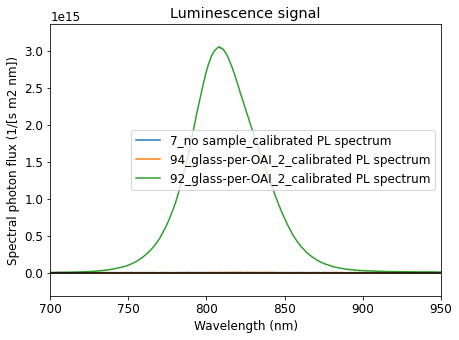

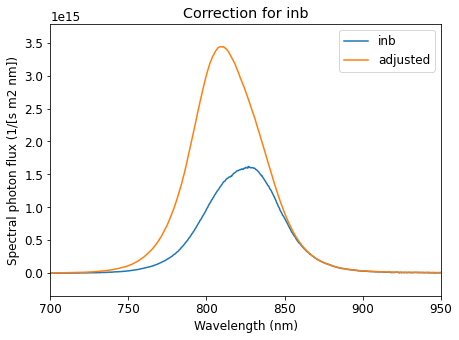

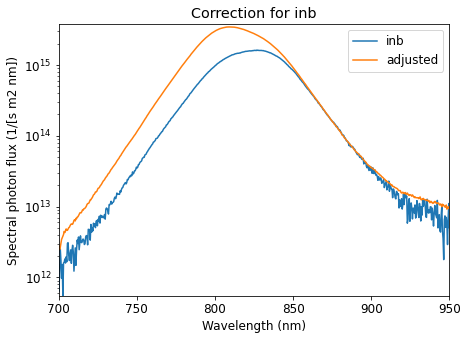

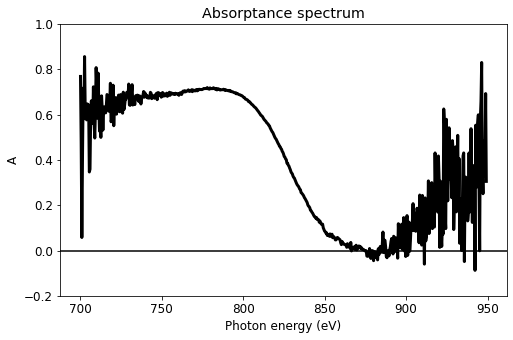

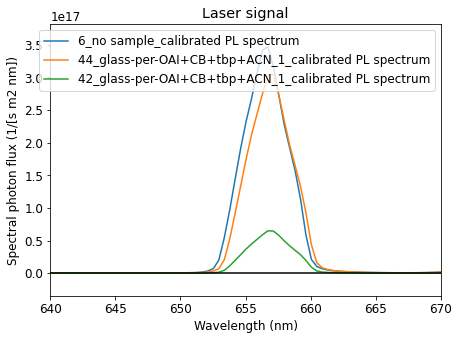

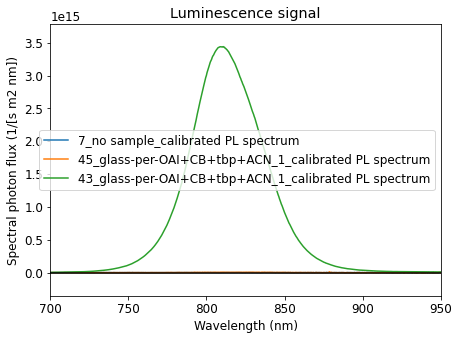

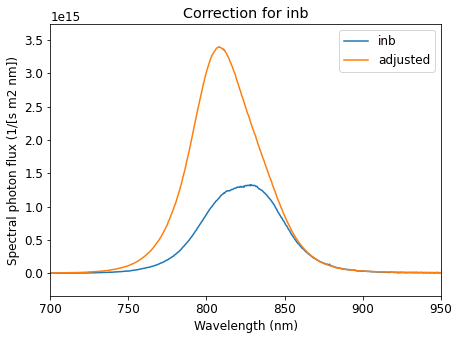

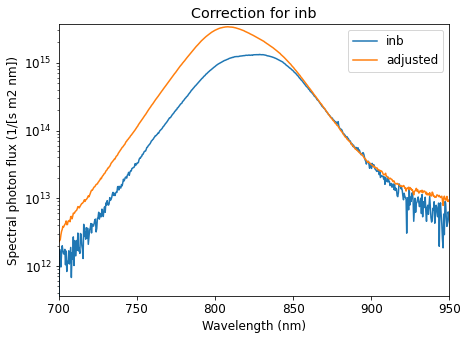

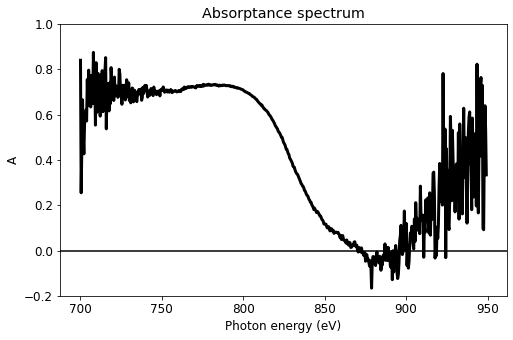

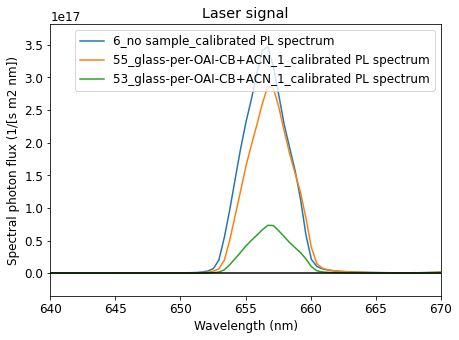

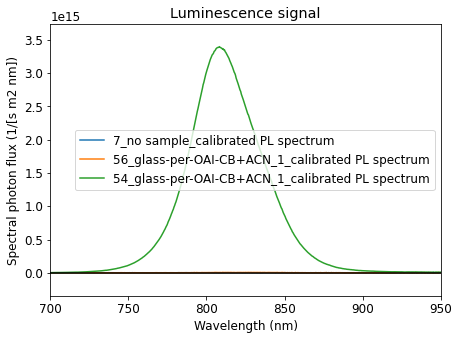

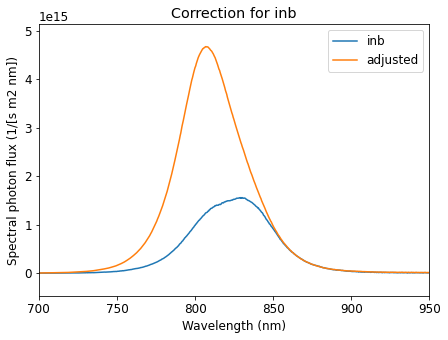

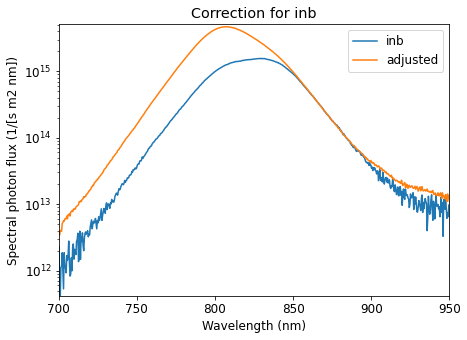

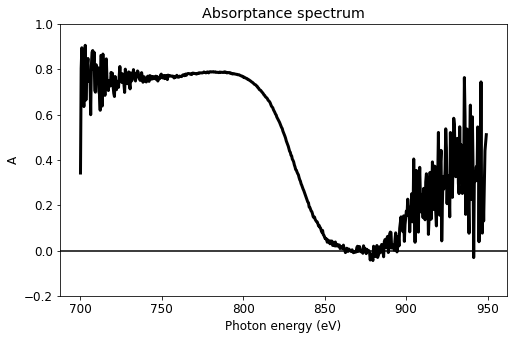

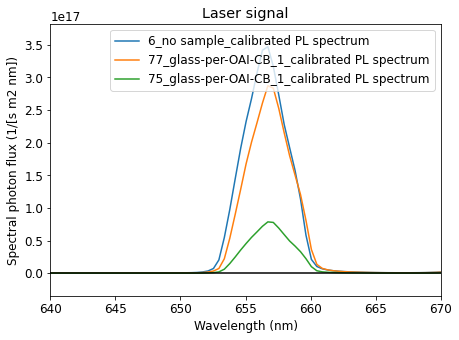

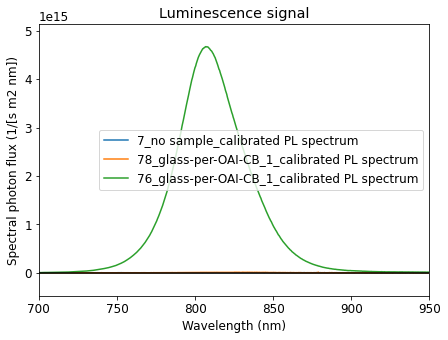

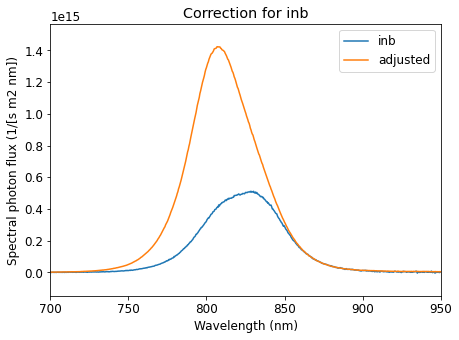

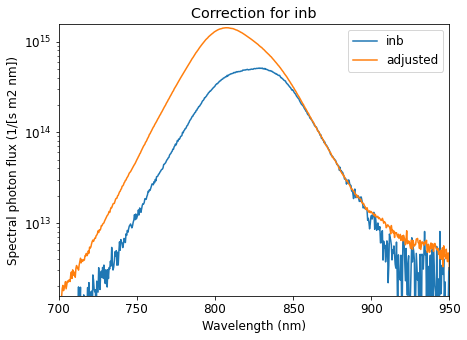

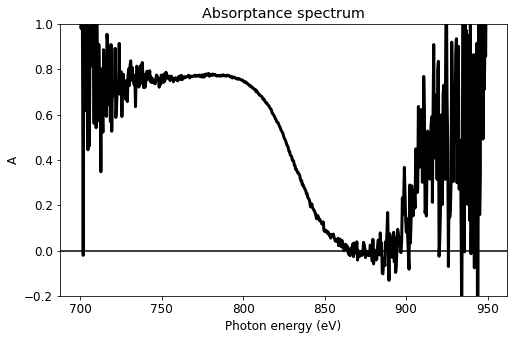

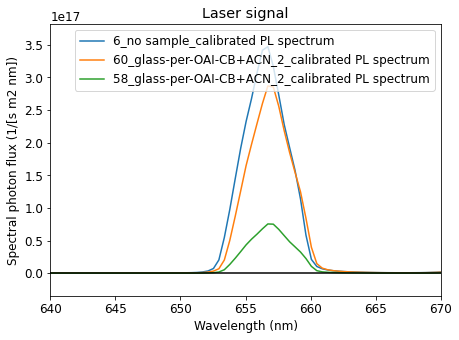

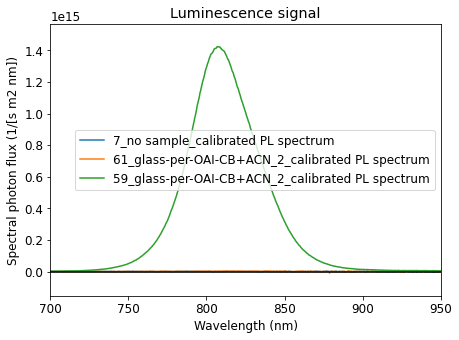

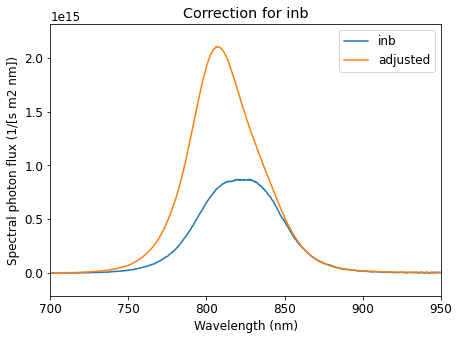

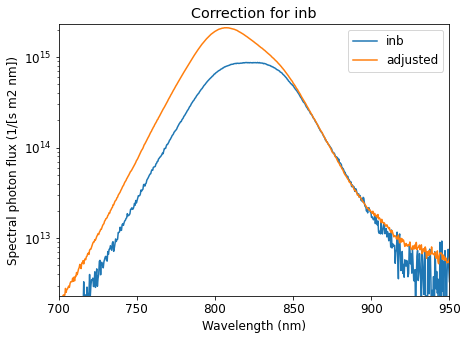

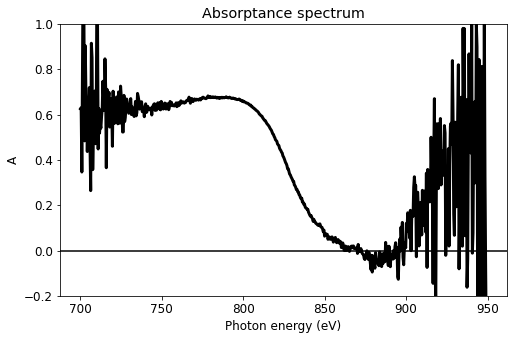

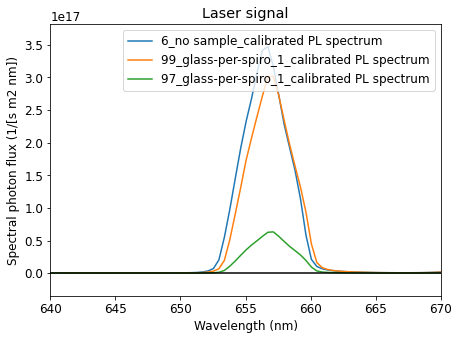

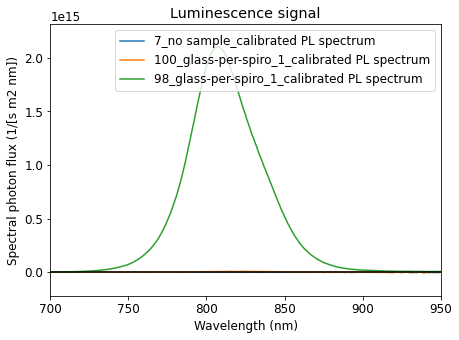

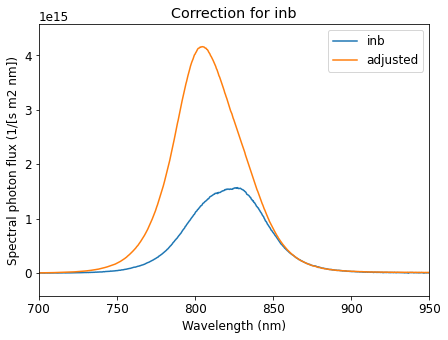

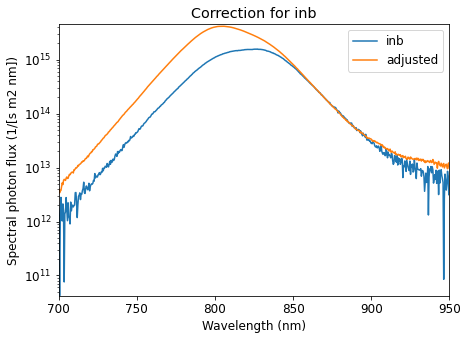

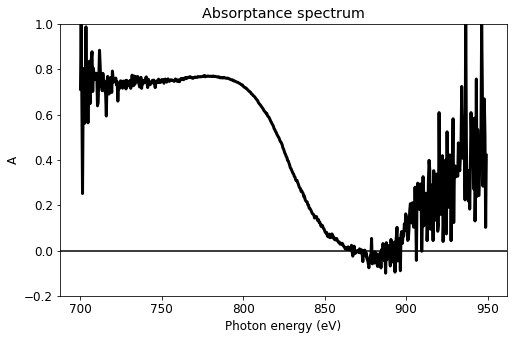

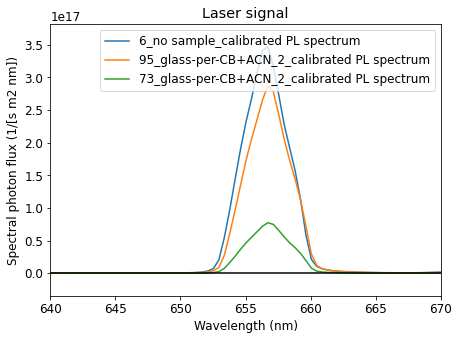

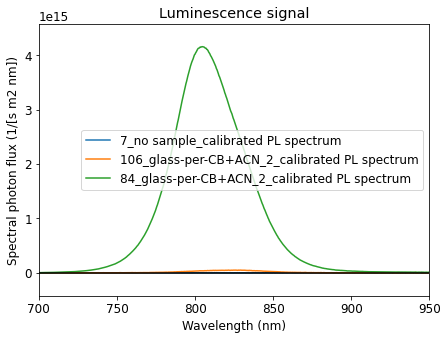

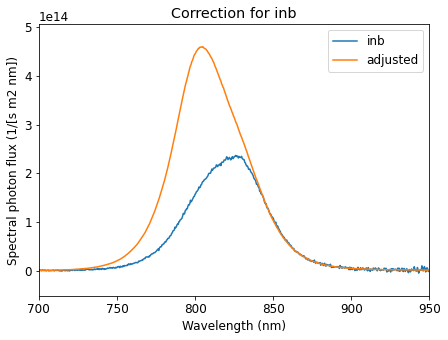

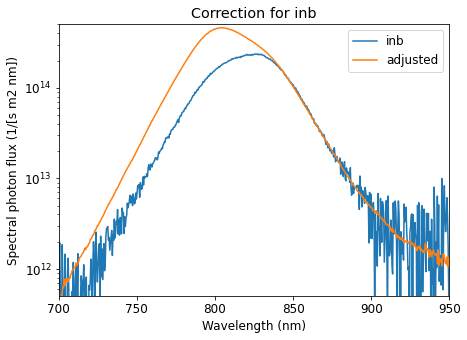

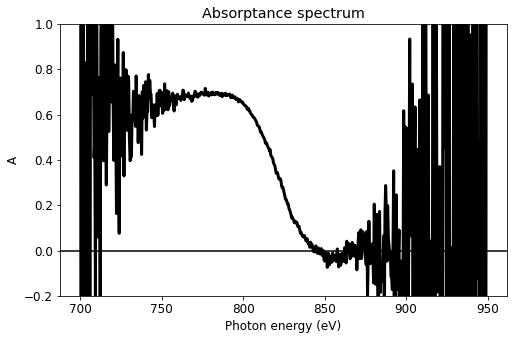

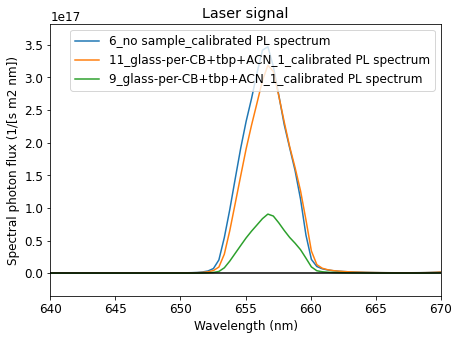

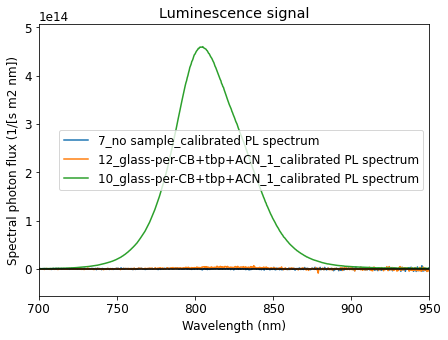

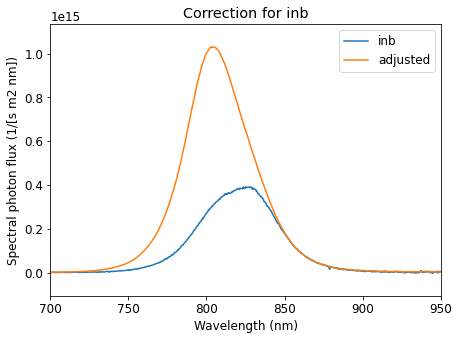

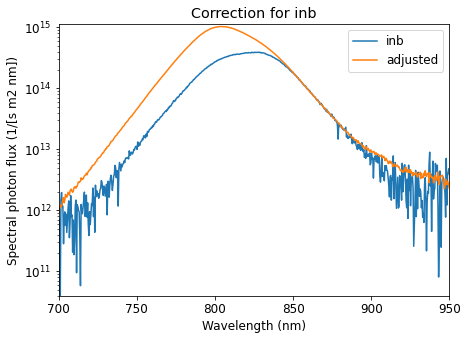

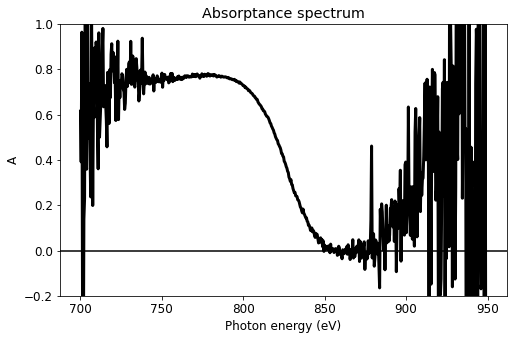

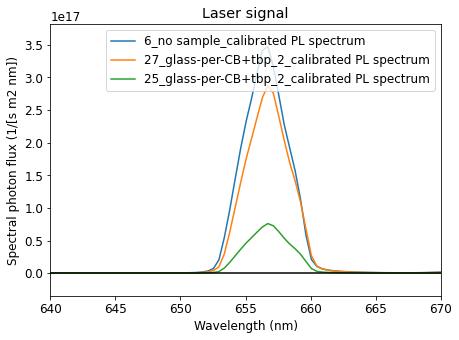

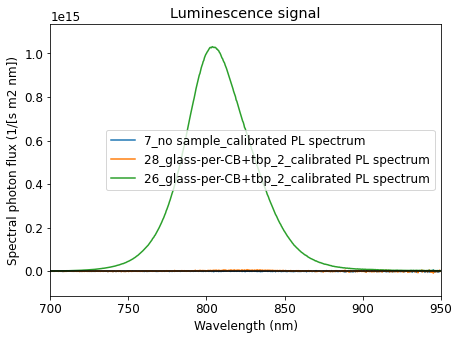

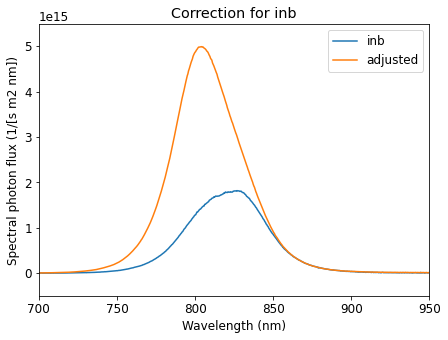

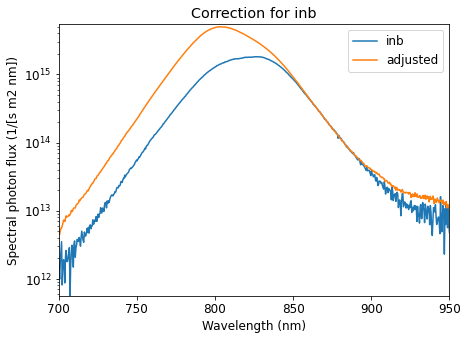

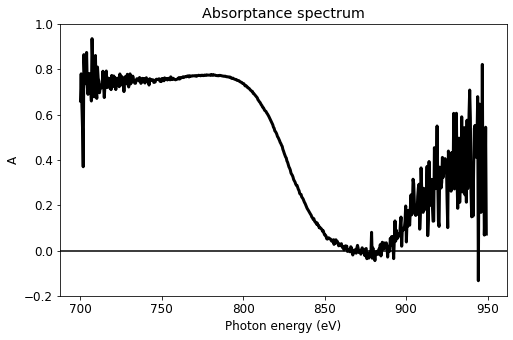

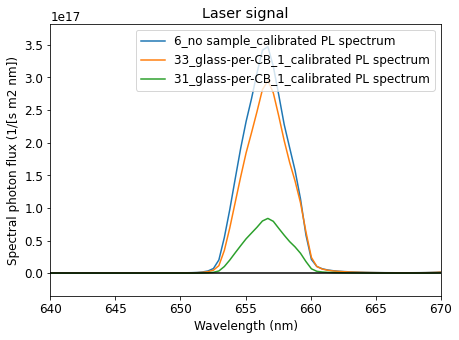

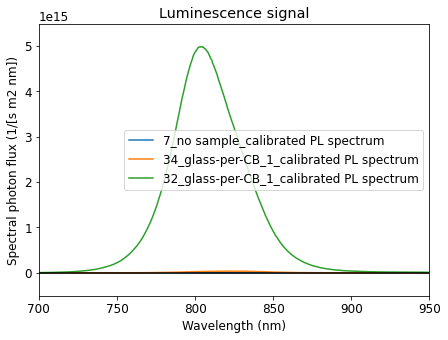

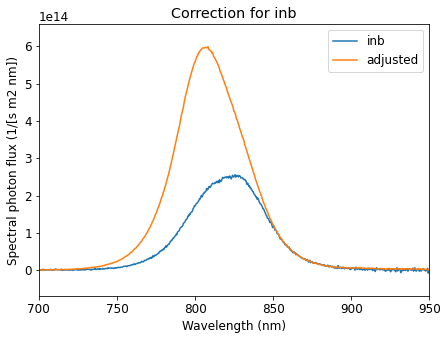

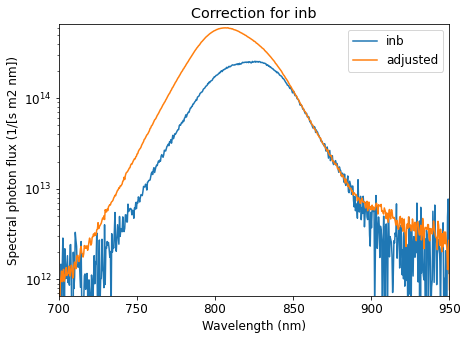

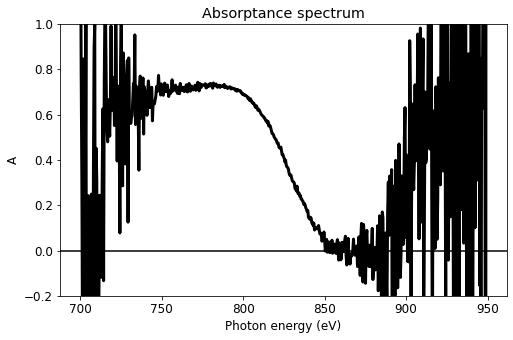

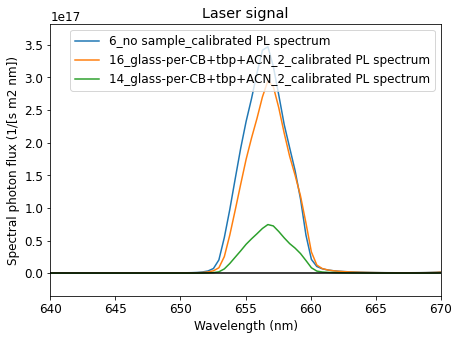

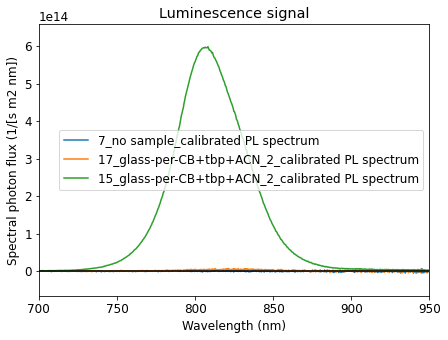

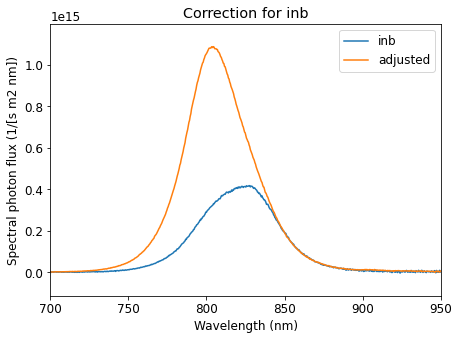

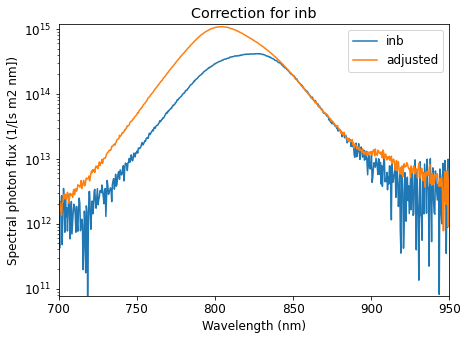

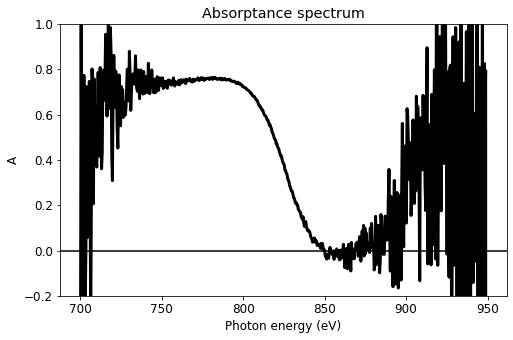

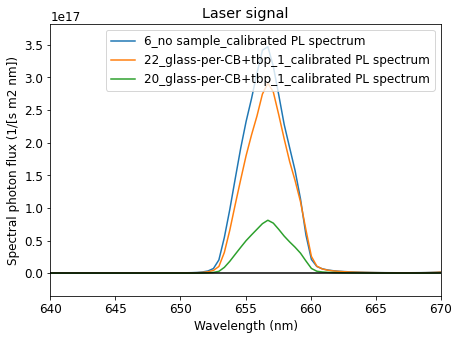

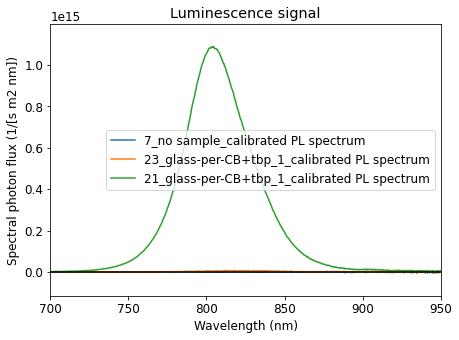

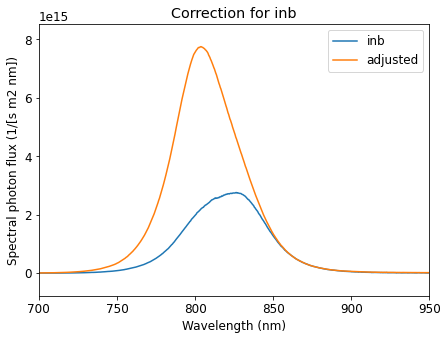

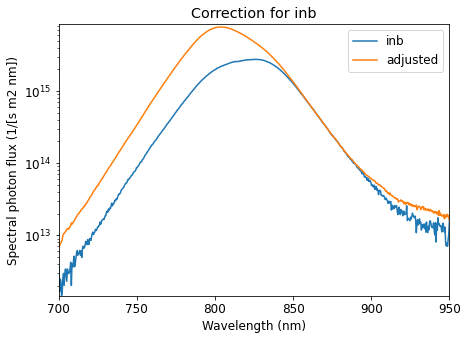

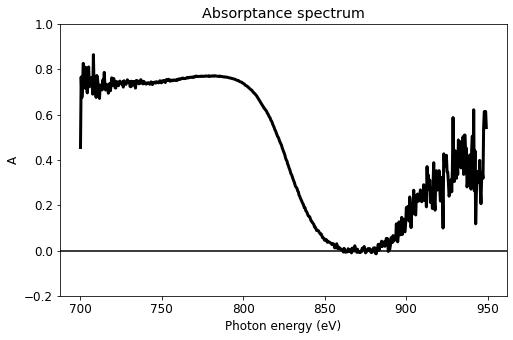

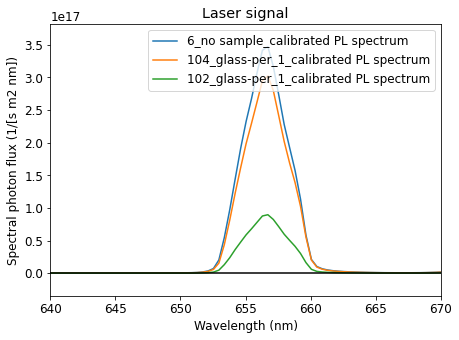

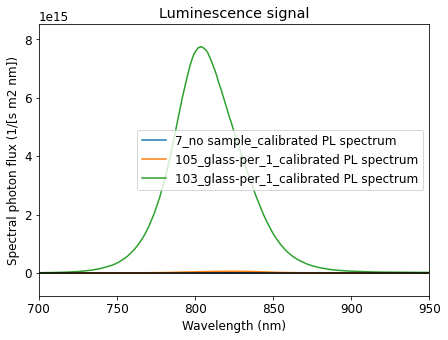

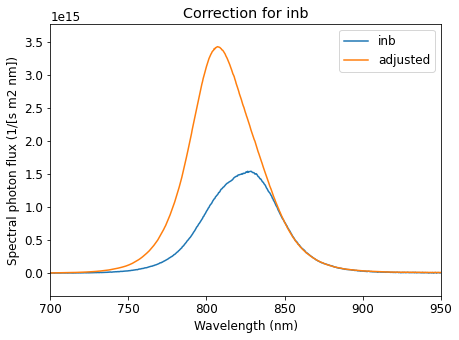

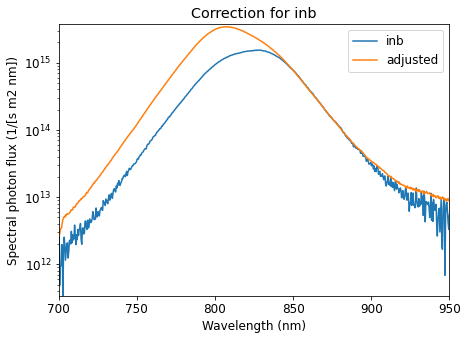

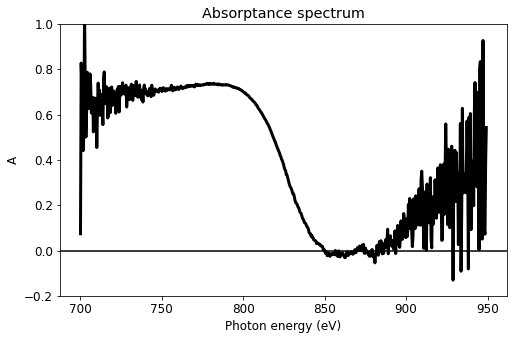

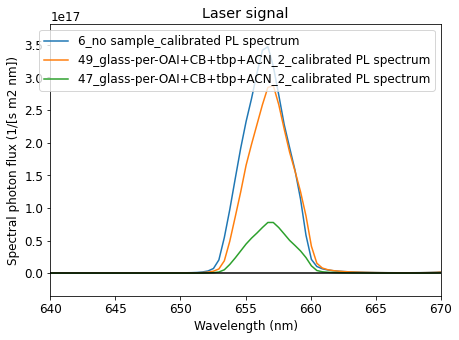

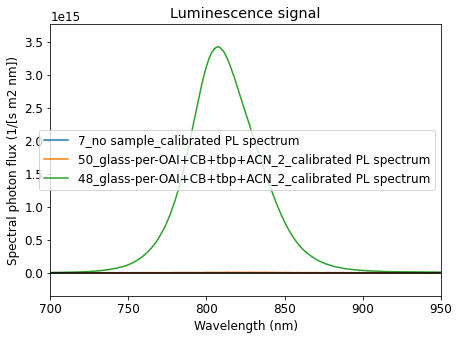

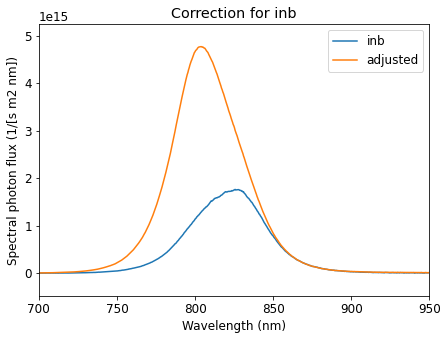

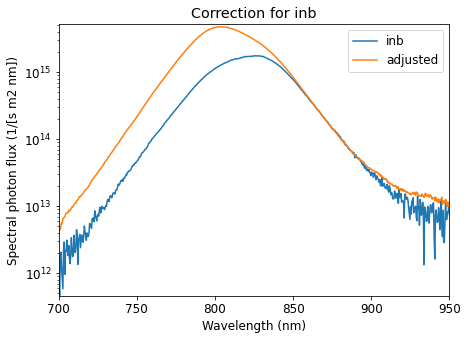

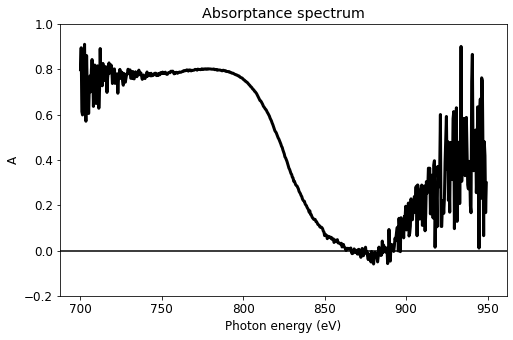

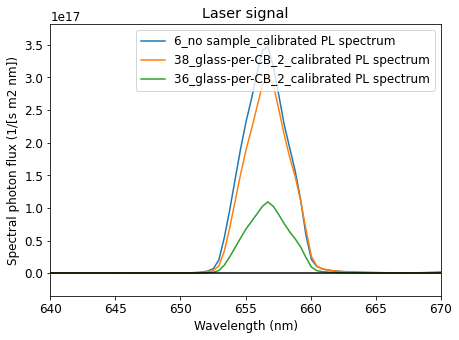

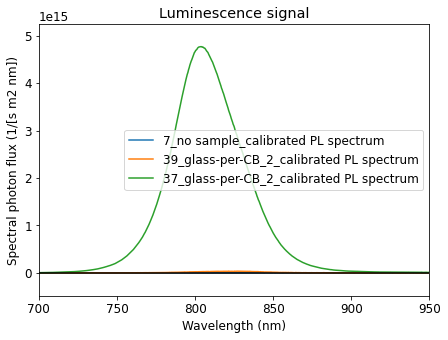

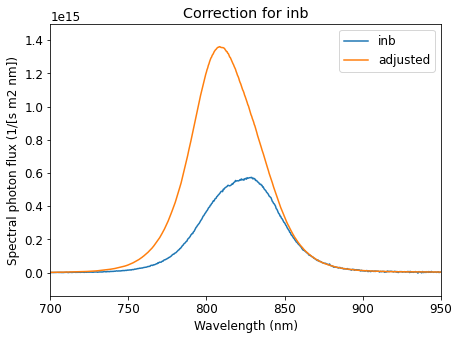

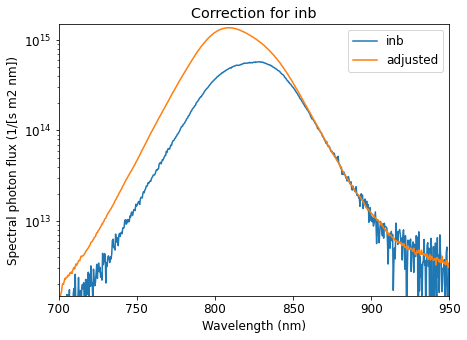

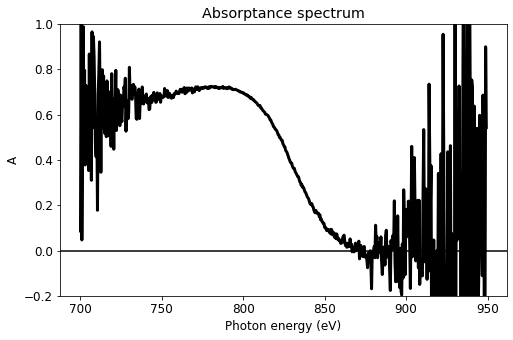

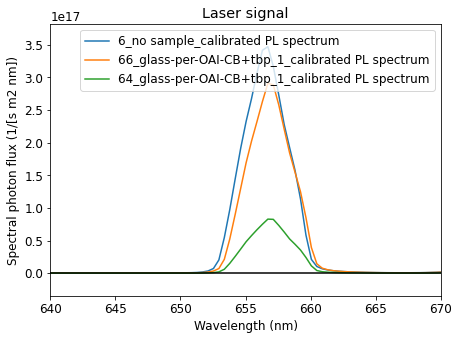

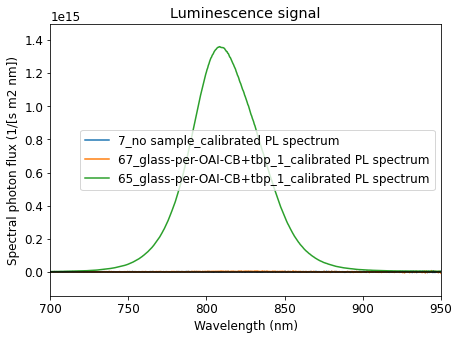

In [29]:
for idx in range(len(names)):
    show_details = True
    sample_name = names[idx]
    group = thot.filter({'metadata.name' : sample_name}, samples)
    Lb = find({'metadata.em_filter' : laser_marker, 'metadata.inboob' : 'outofbeam'}, group, show_details = show_details)
    Lc = find({'metadata.em_filter' : laser_marker, 'metadata.inboob' : 'inbeam'}, group, show_details = show_details)
    Pb = find({'metadata.em_filter' : PL_marker, 'metadata.inboob' : 'outofbeam'}, group, show_details = show_details)
    Pc = find({'metadata.em_filter' : PL_marker, 'metadata.inboob' : 'inbeam'}, group, show_details = show_details)
    fs = find({'metadata.em_filter' : PL_marker, 'metadata.fsip' : 'fs'}, group, show_details = show_details)

    show_details = True

    sPL = PLQY_dataset(db, La, Lb, Lc, Pa, Pb, Pc, fs, sample_name)
    #sPL.fs.plot(yscale = 'linear', title = sPL.fs_asset.metadata['orig_fn'])
    #sPL.P.plot()

    sPL.find_PL_peak()
    sPL.inb_adjust(left = sPL.PL_peak + corr_offs_left, right = sPL.PL_peak + corr_offs_right, adj_factor = None, show_adjust_factor = False, show = show_details)
    sPL.calc_abs(what = 'inb', show_details = show_details)

    #sPL.oob_adjust(left = sPL.PL_peak + corr_offs_left, right = sPL.PL_peak + corr_offs_right, adj_factor = None, show_adjust_factor = True, show = True)
    #sPL.calc_abs(what = 'oob', show_details = show_details)

    sPL.calc_PLQY(show = show_details, eval_Pb = eval_Pb, show_lum = 'linear')

    sPL.abs_pf_spec(nsuns = 1)

    sPL.save_asset()